# Homework

## Nevena Pavlovska and Martin Penev

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from collections import Counter
import matplotlib.cm as cm

import warnings

warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df = pd.read_csv(r".\database.csv")
df

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4


In [5]:
df.describe()

,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
count,1.215746e+07,1.215746e+07,1.215391e+07,1.215746e+07,1.215746e+07,1.215746e+07,1.215746e+07,1.214156e+07
mean,2.295275e+03,9.597751e+02,3.355556e-01,6.017981e+01,2.492023e+01,6.017971e+01,2.492023e+01,1.565044e+01
std,2.452067e+04,7.346528e+03,3.428006e+01,1.733003e-02,5.764062e-02,1.738792e-02,5.783290e-02,5.497952e+00
min,-4.292467e+06,0.000000e+00,-4.689001e+02,6.014792e+01,2.472137e+01,6.014792e+01,2.472137e+01,-5.200000e+00
25%,1.000000e+03,3.440000e+02,1.467403e-01,6.016723e+01,2.490969e+01,6.016689e+01,2.490969e+01,1.230000e+01
50%,1.739000e+03,5.860000e+02,1.863679e-01,6.017608e+01,2.493407e+01,6.017559e+01,2.493407e+01,1.640000e+01
75%,2.869000e+03,9.710000e+02,2.204348e-01,6.018964e+01,2.495029e+01,6.018964e+01,2.495029e+01,1.930000e+01
max,3.681399e+06,5.401659e+06,1.699104e+04,6.023911e+01,2.510620e+01,6.023911e+01,2.510620e+01,3.290000e+01


### Task 1. Univariate: Compare the distribution of 1 quantitative attribute between categories using 2 approaches for univariate data (e.g., strip, jitter, histogram, violin, boxplot)

In [12]:
numOfOccurrencesInClass = df['departure_name'].value_counts().sort_index()
numOfOccurrencesInClass.sort_values(ascending=False)

Itämerentori              330397
Töölönlahdenkatu          242555
Kamppi (M)                201560
Rautatientori / länsi     175358
Ympyrätalo                172776
                           ...  
Elfvik                      2449
Hagalundinpuisto            2365
Itäkeskus Metrovarikko      1233
Outotec                     1150
Derby Business Park          351
Name: departure_name, Length: 347, dtype: int64

The most samples have the classes: Itämerentori, Töölönlahdenkatu and Kamppi (M). So we will use those classes for the next plots.

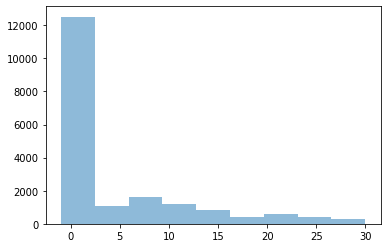

In [38]:
bins = np.linspace(-1, 30, 10)

plt.hist(df[df['departure_name'] == 'Itämerentori']['distance (m)'], bins, alpha=0.5, label='Itämerentori')
plt.show()

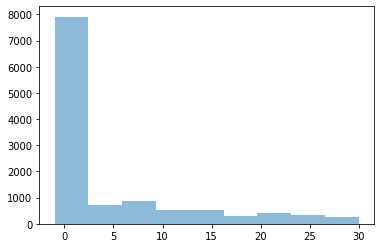

In [37]:
plt.hist(df[df['departure_name'] == 'Töölönlahdenkatu']['distance (m)'], bins, alpha=0.5, label='Töölönlahdenkatu')
plt.show()

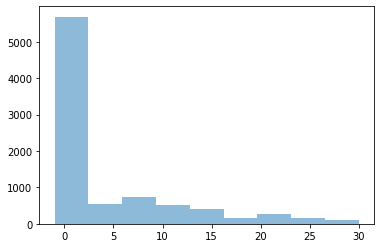

In [36]:
plt.hist(df[df['departure_name'] == 'Kamppi (M)']['distance (m)'], bins, alpha=0.5, label='Kamppi')
plt.show()

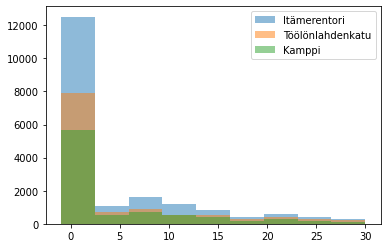

In [32]:
bins = np.linspace(-1, 30, 10)

plt.hist(df[df['departure_name'] == 'Itämerentori']['distance (m)'], bins, alpha=0.5, label='Itämerentori')
plt.hist(df[df['departure_name'] == 'Töölönlahdenkatu']['distance (m)'], bins, alpha=0.5, label='Töölönlahdenkatu')
plt.hist(df[df['departure_name'] == 'Kamppi (M)']['distance (m)'], bins, alpha=0.5, label='Kamppi')
plt.legend(loc='upper right')
plt.show()

### Task 2. Bivariate: make a scatterplot. (For an origin-destination dataset you could turn each destination/group of destinations into an attribute, e.g., refugees to Germany, ... France, ... Austria) 

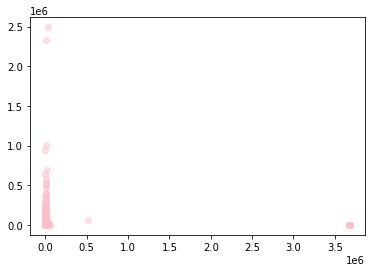

In [45]:
plt.scatter(df[df['departure_name'] == 'Itämerentori']['distance (m)'], df[df['departure_name'] == 'Itämerentori']['duration (sec.)'], c='pink', alpha=0.5)
plt.show()

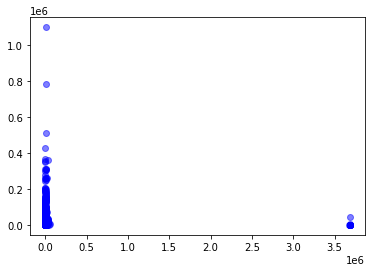

In [46]:
plt.scatter(df[df['departure_name'] == 'Töölönlahdenkatu']['distance (m)'], df[df['departure_name'] == 'Töölönlahdenkatu']['duration (sec.)'], c='blue', alpha=0.5)
plt.show()

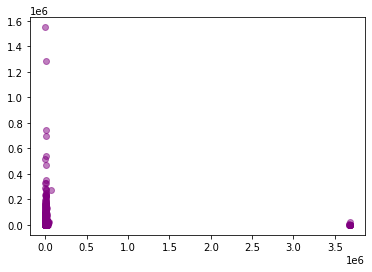

In [47]:
plt.scatter(df[df['departure_name'] == 'Kamppi (M)']['distance (m)'], df[df['departure_name'] == 'Kamppi (M)']['duration (sec.)'], c='purple', alpha=0.5)
plt.show()

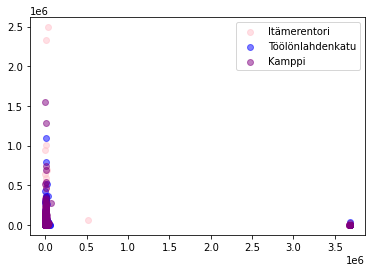

In [48]:
plt.scatter(df[df['departure_name'] == 'Itämerentori']['distance (m)'], df[df['departure_name'] == 'Itämerentori']['duration (sec.)'], c='pink', alpha=0.5, label='Itämerentori')
plt.scatter(df[df['departure_name'] == 'Töölönlahdenkatu']['distance (m)'], df[df['departure_name'] == 'Töölönlahdenkatu']['duration (sec.)'], c='blue', alpha=0.5, label='Töölönlahdenkatu')
plt.scatter(df[df['departure_name'] == 'Kamppi (M)']['distance (m)'], df[df['departure_name'] == 'Kamppi (M)']['duration (sec.)'], c='purple', alpha=0.5, label='Kamppi')
plt.legend(loc='upper right')
plt.show()

### Task 3. Compare bivariate patterns between categories using small multiples scatter plots.

### Task 4. Geography: symbol map and choropleth map (either separately or layered) to show two quantitative attributes on a map 

### Task 5. Time: show development over time.

### Task 6. Prepare two additional visualizationsof the dataset & explain what they express

### Task 7. Duplicate one visualization and add filter widgets. 

### Task 8. Prepare a dashboard of two visualization that allows interactive filtering or highlighting.